In [183]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [184]:
stores=pd.DataFrame(pd.read_csv("store-sales/store.csv",low_memory=False))
test=pd.DataFrame(pd.read_csv("store-sales/test.csv",low_memory=False))
train=pd.DataFrame(pd.read_csv("store-sales/train.csv",low_memory=False))

In [185]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [186]:
merge=train.merge(stores, on='Store', how='left')
merge

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [187]:
comp=merge.dropna(subset=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])
comp

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017202,1109,2,2013-01-01,0,0,0,0,a,1,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [188]:
comp.CompetitionOpenSinceYear=comp.CompetitionOpenSinceYear.astype(int)

comp.CompetitionOpenSinceMonth=comp.CompetitionOpenSinceMonth.astype(int)

/Users/manal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [189]:
comp['Day']=1


<ipython-input-189-a1b8497b435d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp['Day']=1


In [190]:
comp["Date"] = pd.to_datetime(comp['Date'])

<ipython-input-190-0b9a3dde223e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp["Date"] = pd.to_datetime(comp['Date'])


In [191]:
min(comp["Date"].dt.year)

2013

In [192]:
#comp["CompetitionOpenSinceYear"] = pd.to_datetime(comp['CompetitionOpenSinceYear'])

In [193]:
comp

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,NaN,NaN,NaN,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,NaN,NaN,NaN,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4,2004,0,NaN,NaN,NaN,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1,c,a,3490.0,4,2011,1,22.0,2012.0,"Jan,Apr,Jul,Oct",1
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9,2010,0,NaN,NaN,NaN,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1


In [194]:
indexNames =comp[(comp['CompetitionOpenSinceYear'] <min(comp["Date"].dt.year))].index

In [195]:
comp.drop(indexNames , inplace=True)

/Users/manal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [196]:
#comp['Datecomp']=comp['CompetitionOpenSinceYear']*1000 + comp['CompetitionOpenSinceMonth']*10+comp['Day']

In [197]:
 comp['DateComp']=pd.to_datetime(comp['CompetitionOpenSinceYear']*1000 + comp['CompetitionOpenSinceMonth']*10+comp['Day'], format='%Y%m%d', errors='ignore')

<ipython-input-197-0c82ac87556c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp['DateComp']=pd.to_datetime(comp['CompetitionOpenSinceYear']*1000 + comp['CompetitionOpenSinceMonth']*10+comp['Day'], format='%Y%m%d', errors='ignore')


In [198]:
comp.CompetitionDistance=comp.CompetitionDistance.astype(int)
comp['Distance']="Très loin"


/Users/manal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-198-94f0779edf1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp['Distance']="Très loin"


In [199]:
for i in range(0,comp.shape[0]):
    if (comp.iloc[i,11]<=500):
        comp.iloc[i,20]="Tres proche"        
    if (comp.iloc[i,11]>500) & (comp.iloc[i,11]<=2000):
        comp.iloc[i,20]="proche"
    if (comp.iloc[i,11]>2000) & (comp.iloc[i,11]<=10000):
        comp.iloc[i,20]="Loin"

/Users/manal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [200]:
comp

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,DateComp,Distance
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910,4,2015,0,NaN,NaN,NaN,1,2015-04-01,Très loin
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,310,12,2013,0,NaN,NaN,NaN,1,2013-12-01,Tres proche
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,24000,4,2013,0,NaN,NaN,NaN,1,2013-04-01,Très loin
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,7520,10,2014,0,NaN,NaN,NaN,1,2014-10-01,Loin
13,14,5,2015-07-31,6544,710,1,1,0,1,a,...,1300,3,2014,1,40.0,2011.0,"Jan,Apr,Jul,Oct",1,2014-03-01,proche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017178,1085,2,2013-01-01,0,0,0,0,a,1,c,...,4030,2,2015,0,NaN,NaN,NaN,1,2015-02-01,Loin
1017179,1086,2,2013-01-01,0,0,0,0,a,1,a,...,180,11,2013,1,18.0,2011.0,"Feb,May,Aug,Nov",1,2013-11-01,Tres proche
1017187,1094,2,2013-01-01,0,0,0,0,a,1,d,...,2380,3,2013,1,40.0,2014.0,"Jan,Apr,Jul,Oct",1,2013-03-01,Loin
1017192,1099,2,2013-01-01,0,0,0,0,a,1,a,...,200,4,2013,1,14.0,2013.0,"Jan,Apr,Jul,Oct",1,2013-04-01,Tres proche


In [201]:
comp['after']=(comp['Date']>=comp['DateComp']).astype(int)
comp['before']=(comp['Date']<comp['DateComp']).astype(int)


<ipython-input-201-d15e56126200>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp['after']=(comp['Date']>=comp['DateComp']).astype(int)
<ipython-input-201-d15e56126200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp['before']=(comp['Date']<comp['DateComp']).astype(int)


In [202]:
#comp['after']=(compyearafter['Date'].dt.month>=compyearafter['CompetitionOpenSinceMonth']).astype(int)

In [203]:
comp = comp[comp['Sales']>0]

In [204]:
comp

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,DateComp,Distance,after,before
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015,0,NaN,NaN,NaN,1,2015-04-01,Très loin,1,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,2013,0,NaN,NaN,NaN,1,2013-12-01,Tres proche,1,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,2013,0,NaN,NaN,NaN,1,2013-04-01,Très loin,1,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,2014,0,NaN,NaN,NaN,1,2014-10-01,Loin,1,0
13,14,5,2015-07-31,6544,710,1,1,0,1,a,...,2014,1,40.0,2011.0,"Jan,Apr,Jul,Oct",1,2014-03-01,proche,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016073,1094,3,2013-01-02,5330,432,1,0,0,1,d,...,2013,1,40.0,2014.0,"Jan,Apr,Jul,Oct",1,2013-03-01,Loin,0,1
1016078,1099,3,2013-01-02,11883,1477,1,0,0,1,a,...,2013,1,14.0,2013.0,"Jan,Apr,Jul,Oct",1,2013-04-01,Tres proche,0,1
1016090,1111,3,2013-01-02,5097,505,1,0,0,1,a,...,2014,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,2014-06-01,proche,0,1
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,2013,0,NaN,NaN,NaN,1,2013-05-01,proche,0,1


In [205]:
#compyebefore=comp[comp['Date'].dt.year<comp['CompetitionOpenSinceYear']]
#comp['before']=(compyebefore['Date'].dt.month<compyebefore['CompetitionOpenSinceMonth']).astype(int)

In [206]:
comp

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,DateComp,Distance,after,before
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015,0,NaN,NaN,NaN,1,2015-04-01,Très loin,1,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,2013,0,NaN,NaN,NaN,1,2013-12-01,Tres proche,1,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,2013,0,NaN,NaN,NaN,1,2013-04-01,Très loin,1,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,2014,0,NaN,NaN,NaN,1,2014-10-01,Loin,1,0
13,14,5,2015-07-31,6544,710,1,1,0,1,a,...,2014,1,40.0,2011.0,"Jan,Apr,Jul,Oct",1,2014-03-01,proche,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016073,1094,3,2013-01-02,5330,432,1,0,0,1,d,...,2013,1,40.0,2014.0,"Jan,Apr,Jul,Oct",1,2013-03-01,Loin,0,1
1016078,1099,3,2013-01-02,11883,1477,1,0,0,1,a,...,2013,1,14.0,2013.0,"Jan,Apr,Jul,Oct",1,2013-04-01,Tres proche,0,1
1016090,1111,3,2013-01-02,5097,505,1,0,0,1,a,...,2014,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,2014-06-01,proche,0,1
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,2013,0,NaN,NaN,NaN,1,2013-05-01,proche,0,1


In [207]:
comp['meanBasket']= comp['Sales']/comp['Customers']


<ipython-input-207-dd2c331a10d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp['meanBasket']= comp['Sales']/comp['Customers']


In [208]:
comp['StoreType'].value_counts()

a    81489
d    46272
c    15112
b     1884
Name: StoreType, dtype: int64

In [209]:
comp.groupby(['StoreType', 'before']).sum()

Store  DayOfWeek      Sales  Customers   Open  Promo  \
StoreType before                                                            
a         0       22797818     154529  320387000   35685849  43866  19783   
          1       21371130     132309  262628497   30462242  37623  16643   
b         0         408675       5117   22170138    3677821   1279    495   
          1         236595       2415    7547060    1303608    605    225   
c         0        3845966      22076   53114353    6162563   6300   2848   
          1        5727291      30929   69799910    8170224   8812   3940   
d         0       12649563      81576  161842915   14433609  23211  10519   
          1       10916282      81087  165873635   14854848  23061  10131   

                  SchoolHoliday  CompetitionDistance  \
StoreType before                                       
a         0                8617            345107500   
          1                7298            209531400   
b         0                 238              1550350   
          1                 104               757550   
c         0                1241             23025090   
          1                1762             34031410   
d         0                4325            197175390   
          1                4455            142499360   

                  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
StoreType before                                                                
a         0                          272064                  88316210   19874   
          1                          261616                  75780149   15572   
b         0                            6395                   2575084       0   
          1                            3025                   1218350       0   
c         0                           47100                  12683902    1823   
          1                           56121                  17751844    2525   
d         0                          152897                  46734311   10775   
          1                          161187                  46446486   10552   

                  Promo2SinceWeek  Promo2SinceYear    Day  after  \
StoreType before                                                   
a         0              440765.0       39991790.0  43866  43866   
          1              350471.0       31333366.0  37623      0   
b         0                   0.0              0.0   1279   1279   
          1                   0.0              0.0    605      0   
c         0               40478.0        3670640.0   6300   6300   
          1               41054.0        5079276.0   8812      0   
d         0              251262.0       21684688.0  23211  23211   
          1              246144.0       21229245.0  23061      0   

                     meanBasket  
StoreType before                 
a         0       394740.450703  
          1       328637.133863  
b         0         7642.353056  
          1         3474.551640  
c         0        54944.219708  
          1        76169.071241  
d         0       261674.388407  
          1       257754.913833

In [210]:

compregroup=comp.groupby(['Store', 'before']).sum()


Text(0.5, 1.0, 'MeanBasket')

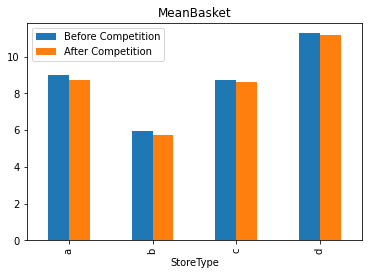

In [211]:
comp.groupby(['StoreType', 'before']).mean()['meanBasket'].unstack().plot.bar()
plt.legend(['Before Competition','After Competition'])
plt.title('MeanBasket')

Text(0.5, 1.0, 'Sales')

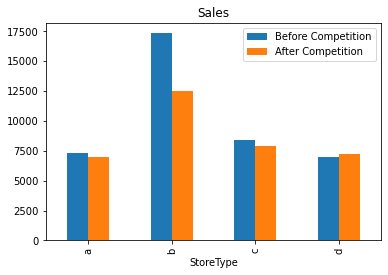

In [212]:
comp.groupby(['StoreType', 'before']).mean()['Sales'].unstack().plot.bar()
plt.legend(['Before Competition','After Competition'])
plt.title('Sales')

Text(0.5, 1.0, 'Customers')

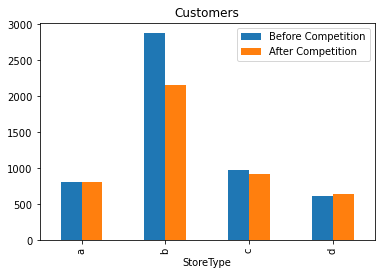

In [213]:
comp.groupby(['StoreType', 'before']).mean()['Customers'].unstack().plot.bar()
plt.legend(['Before Competition','After Competition'])
plt.title('Customers')

Text(0.5, 1.0, 'MeanBasket')

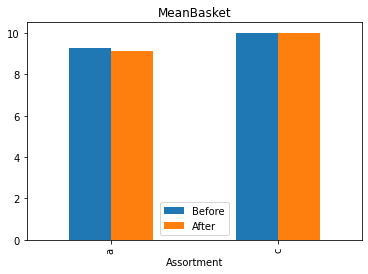

In [214]:
comp.groupby(['Assortment', 'before']).mean()['meanBasket'].unstack().plot.bar()
plt.legend(['Before','After'])
plt.title('MeanBasket')

Text(0.5, 1.0, 'Sales')

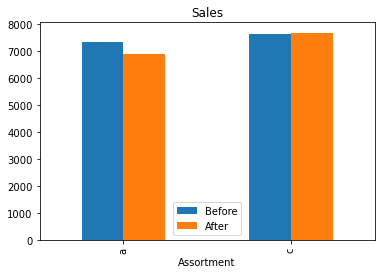

In [215]:
comp.groupby(['Assortment', 'before']).mean()['Sales'].unstack().plot.bar()
plt.legend(['Before','After'])
plt.title('Sales')

Text(0.5, 1.0, 'Customers')

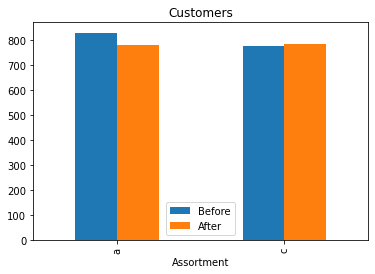

In [216]:
comp.groupby(['Assortment', 'before']).mean()['Customers'].unstack().plot.bar()
plt.legend(['Before','After'])
plt.title('Customers')

Text(0.5, 1.0, 'MeanBasket')

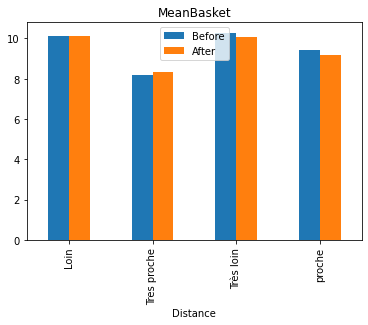

In [217]:
comp.groupby(['Distance', 'before']).mean()['meanBasket'].unstack().plot.bar()
plt.legend(['Before','After'])
plt.title('MeanBasket')

Text(0.5, 1.0, 'Sales')

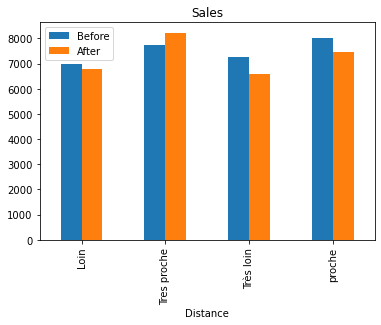

In [218]:
comp.groupby(['Distance', 'before']).mean()['Sales'].unstack().plot.bar()
plt.legend(['Before','After'])
plt.title('Sales')

Text(0.5, 1.0, 'Customers')

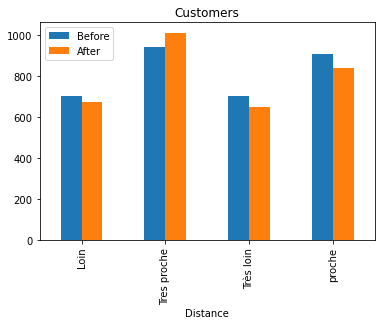

In [219]:
comp.groupby(['Distance', 'before']).mean()['Customers'].unstack().plot.bar()
plt.legend(['Before','After'])
plt.title('Customers')

In [220]:
sale=comp.groupby(['Store']).sum()

In [221]:
sale.index

Int64Index([   5,    6,    7,    8,   14,   28,   30,   33,   37,   45,
            ...
            1050, 1053, 1059, 1072, 1075, 1085, 1086, 1094, 1099, 1111],
           dtype='int64', name='Store', length=191)

In [222]:
stores.merge(pd.DataFrame({'Store':sale.index}),how='right',on='Store')['StoreType'].value_counts()

a    106
d     63
c     20
b      2
Name: StoreType, dtype: int64

In [223]:
stores.merge(pd.DataFrame({'Store':sale.index}),how='right',on='Store')['Assortment'].value_counts()

a    105
c     86
Name: Assortment, dtype: int64

/Users/manal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/manal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([854., 141.,  80.,  19.,   8.,   5.,   3.,   1.,   0.,   1.]),
 array([2.0000e+01, 7.6040e+03, 1.5188e+04, 2.2772e+04, 3.0356e+04,
        3.7940e+04, 4.5524e+04, 5.3108e+04, 6.0692e+04, 6.8276e+04,
        7.5860e+04]),
 <a list of 10 Patch objects>)

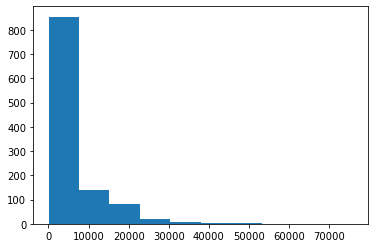

In [224]:
plt.hist(stores['CompetitionDistance'],bins=10)

(array([171., 101.,  60.,  72.,  56.,  42.,  58.,  33.,  33.,  30.,  28.,
         20.,  24.,  23.,  12.,  17.,  12.,  15.,   9.,  12.,  13.,   7.,
          9.,  10.,  14.,   8.,  11.,   7.,   7.,  11.]),
 array([  20.        ,  352.33333333,  684.66666667, 1017.        ,
        1349.33333333, 1681.66666667, 2014.        , 2346.33333333,
        2678.66666667, 3011.        , 3343.33333333, 3675.66666667,
        4008.        , 4340.33333333, 4672.66666667, 5005.        ,
        5337.33333333, 5669.66666667, 6002.        , 6334.33333333,
        6666.66666667, 6999.        , 7331.33333333, 7663.66666667,
        7996.        , 8328.33333333, 8660.66666667, 8993.        ,
        9325.33333333, 9657.66666667, 9990.        ]),
 <a list of 30 Patch objects>)

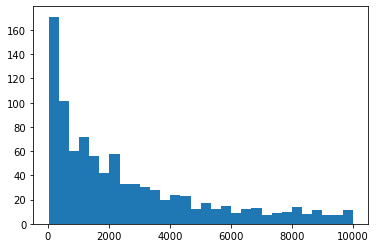

In [225]:
i=stores['CompetitionDistance']<10000

plt.hist(stores[i]['CompetitionDistance'],bins=30)